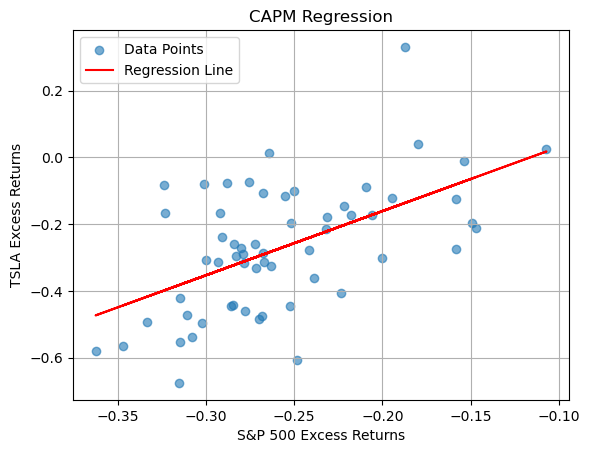

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data from CSV files
sp500_data = pd.read_csv('sp500.csv')
tsla_data = pd.read_csv('TSLA.csv')

# Calculate daily returns
sp500_data['Returns'] = sp500_data['Adj Close**'].pct_change()
tsla_data['Returns'] = tsla_data['Adj Close**'].pct_change()

# Merge the two dataframes based on the 'Date' column
merged_data = pd.merge(tsla_data[['Date', 'Returns']], sp500_data[['Date', 'Returns']], on='Date', suffixes=('_TSLA', '_SP500'))

# Calculate the excess returns (stock return - risk-free rate)
risk_free_rate = 3 / 12  # Assuming 3% annual risk-free rate, converted to daily
merged_data['Excess_Return_TSLA'] = merged_data['Returns_TSLA'] - risk_free_rate
merged_data['Excess_Return_SP500'] = merged_data['Returns_SP500'] - risk_free_rate

# Perform linear regression to estimate beta
slope, intercept, r_value, p_value, std_err = stats.linregress(
    merged_data['Excess_Return_SP500'].dropna(),
    merged_data['Excess_Return_TSLA'].dropna()
)


# Create a scatter plot with regression line
plt.scatter(merged_data['Excess_Return_SP500'], merged_data['Excess_Return_TSLA'], alpha=0.6, label='Data Points')
plt.plot(merged_data['Excess_Return_SP500'], intercept + slope * merged_data['Excess_Return_SP500'], 'r', label='Regression Line')
plt.xlabel('S&P 500 Excess Returns')
plt.ylabel('TSLA Excess Returns')
plt.title('CAPM Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [2]:
# Round the intercept to 4 decimal places
rounded_intercept = round(intercept, 4)

# Print the regression information with the rounded intercept
print("Regression Information:")
print(f"Estimated Beta (slope): {slope:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")


Regression Information:
Estimated Beta (slope): 1.9214
R-squared: 0.3000
P-value: 0.0000
Standard Error: 0.3887


In [3]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the entire contents of tsla_data
print("TSLA Data:")
print(tsla_data)

# Print the entire contents of sp500_data
print("\nS&P 500 Data:")
print(sp500_data)

# Reset display options to default (optional)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


TSLA Data:
          Date    Open    High     Low  Close*  Adj Close**      Volume  \
0   01/09/2023  257.26  259.08  242.01  245.01       245.01   132272500   
1   01/08/2023  266.26  266.47  212.36  258.08       258.08  2501580900   
2   01/07/2023  276.49  299.29  254.12  267.43       267.43  2392089000   
3   01/06/2023  202.59  276.99  199.37  261.77       261.77  3440477900   
4   01/05/2023  163.17  204.48  158.83  203.93       203.93  2681994800   
5   01/04/2023  199.91  202.69  152.37  164.31       164.31  2505176300   
6   01/03/2023  206.21  207.79  163.91  207.46       207.46  3311619900   
7   01/02/2023  173.89  217.65  169.93  205.71       205.71  3624845100   
8   01/01/2023  118.47  180.68  101.81  173.22       173.22  3897499400   
9   01/12/2022  197.08  198.92  108.24  123.18       123.18  2944247700   
10  01/11/2022  234.05  237.40  166.19  194.70       194.70  1885275300   
11  01/10/2022  254.50  257.50  198.59  227.54       227.54  1735263100   
12  01/09/2022